# CO2 Emission by vehicul by OTSMANE Ismail

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# Data Descreption
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

Model 
4WD/4X4 = Four-wheel drive <br>
AWD = All-wheel drive <br>
FFV = Flexible-fuel vehicle <br>
SWB = Short wheelbase <br> 
LWB = Long wheelbase <br>
EWB = Extended wheelbase  <br>

Transmission
A = Automatic <br>
AM = Automated manual <br>
AS = Automatic with select shift <br>
AV = Continuously variable <br>
M = Manual<br>
3 - 10 = Number of gears <br>

Fuel type
X = Regular gasoline <br>
Z = Premium gasoline <br>
D = Diesel <br>
E = Ethanol (E85) <br>
N = Natural gas <br>

Make= Company of the vehicle <br>
Model= Car model <br>
Vehicle Class= Class of vehicle depending on their utility, capacity and weight <br>
Engine Size = Size of engine used in Litre <br>
Cylinders= Number of cylinders <br>
Transmission = Transmission type with number of gears <br>
Fuel type =Type of Fuel used <br>
Fuel Consumption City=Fuel consumption in city roads (L/100 km) <br>
Fuel Consumption Hwy=Fuel consumption in Hwy roads (L/100 km) <br>
Fuel Consumption Comb=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km <br>
Fuel Consumption Comb mpg =The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)<br> 

In [2]:
df = pd.read_csv("CO2 Emissions_Canada.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [8]:
renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_col, axis='columns', inplace=True)

### Rename columns as there are many gaps, which creates un-necessary errors

In [9]:
df

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


# Data-analysis

In [10]:
df.keys()

Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7385 non-null   object 
 1   Model              7385 non-null   object 
 2   vehicle_class      7385 non-null   object 
 3   engine_size        7385 non-null   float64
 4   Cylinders          7385 non-null   int64  
 5   Transmission       7385 non-null   object 
 6   fuel_type          7385 non-null   object 
 7   fuel_cons_city     7385 non-null   float64
 8   fuel_cons_hwy      7385 non-null   float64
 9   fuel_cons_comb     7385 non-null   float64
 10  mpgfuel_cons_comb  7385 non-null   int64  
 11  co2                7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


Lookss like there are no missing values and the data-types are appropriate ,
The dataset contains 7385 observations with 12 columns, with data-types float,int and object.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


# Exploratory Data Analysis    
* Exploratory Data Analysis refers to the critical process of performing 
initial investigations on data so as to discover patterns,to spot anomalies, 
to test hypothesis and to check assumptions with
the help of summary statistics and graphical representations. <br>

* our goal during EDA is to develop an understanding of our data. The easiest way to do this is to use questions as tools to guide our investigation. When we ask a question, the question focuses our attention on a specific part of our dataset and helps us decide which graphs, models, or transformations to make.<br>

* Generate questions about our data.<br>

* Search for answers by visualising, transforming, and modelling our data. <br>
                                                        
**EDA let's you get to know about your dataset. So, try as much explorations which will result in better assumptions in creating the model**

In [13]:
import seaborn as sns 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

# 1. Make

In [14]:
sns.pairplot(df, hue='Make',palette="rocket")

In [ ]:
df_Make=df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make
fig = go.Figure(go.Bar(
    x=df_Make['Make'],y=df_Make['Count'],
    marker={'color': df_Make['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Make['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 25 Company',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

# 2.Cylinders

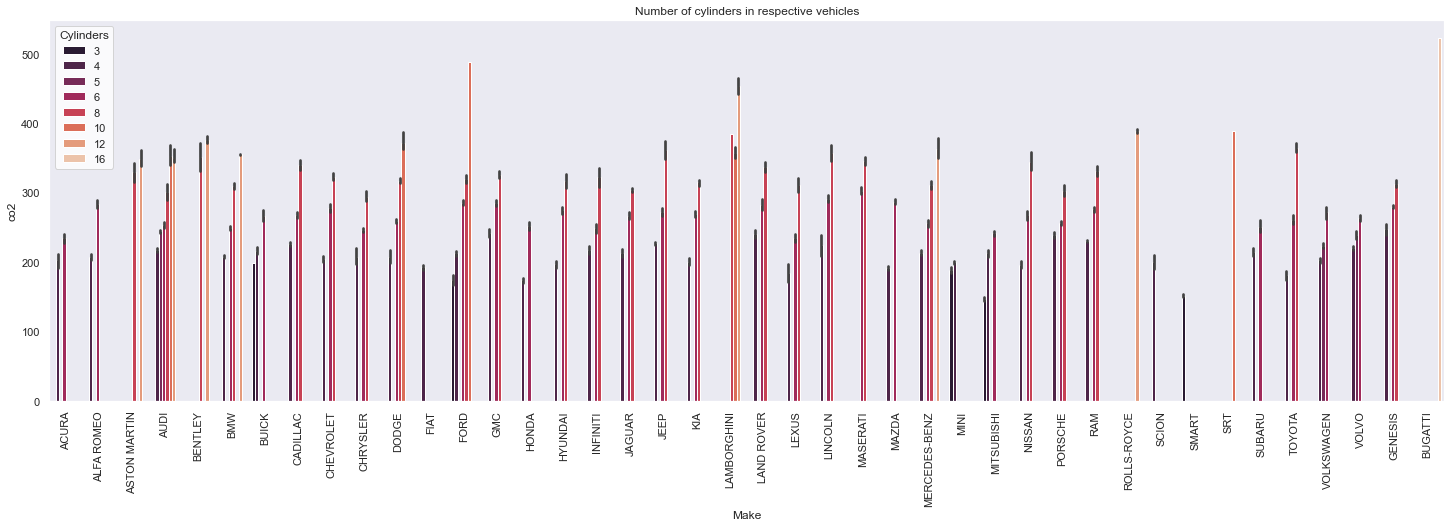

In [ ]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="whitegrid")

x = df.Make.value_counts().sort_values()

ax = sns.barplot(data=df,x='Make',y='co2', hue='Cylinders', palette="rocket")
plt.title('Number of cylinders in respective vehicles')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = px.histogram(df, x="Cylinders")
fig.update_layout(title_text='Cylinders in Vehicles',xaxis_title="Cylinders",yaxis_title="Number of vehicles " )
fig.show()

In [ ]:
df.Cylinders.value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

In [ ]:
df['Cylinders'].value_counts(normalize=True)

4     0.436019
6     0.331212
8     0.189844
12    0.020447
3     0.012864
10    0.005687
5     0.003521
16    0.000406
Name: Cylinders, dtype: float64

In [ ]:
cel =df['Cylinders'].value_counts().reset_index()
fig = px.pie(cel, values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()

43.6% of the vehicles have 4 cylinders followed by 6 cylinders and 8. Only 3  vehicles have highest number of cylinders - 16

# 3.CO2 

In [ ]:
df[df.co2 == df.co2.max()]

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


highest co2 emitter Bugetti seems to have maximum num of cylinders - 16.. We will see how these variables correlate , Bugatti has highest co2 emissions more than 500 while SMART seems to have lwest of 150

# 4. JEEP

In [ ]:
df_JEEP=df[df["Make"]=="JEEP"]
df_JEEP_model=df_JEEP["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})[0:10]
fig = go.Figure(go.Bar(
    x=df_JEEP_model['Model'],y=df_JEEP_model['Count'],
    marker={'color': df_JEEP_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_JEEP_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 JEEP Model',xaxis_title="Model ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

# 5. BMW

In [ ]:
df_BMW=df[df["Make"]=="BMW"]
df_BMW_model=df_BMW["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})[0:10]
fig = go.Figure(go.Bar(
    x=df_BMW_model['Model'],y=df_BMW_model['Count'],
    marker={'color': df_BMW_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_BMW_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 BMW Model',xaxis_title="Model ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

# 6.lamborghini

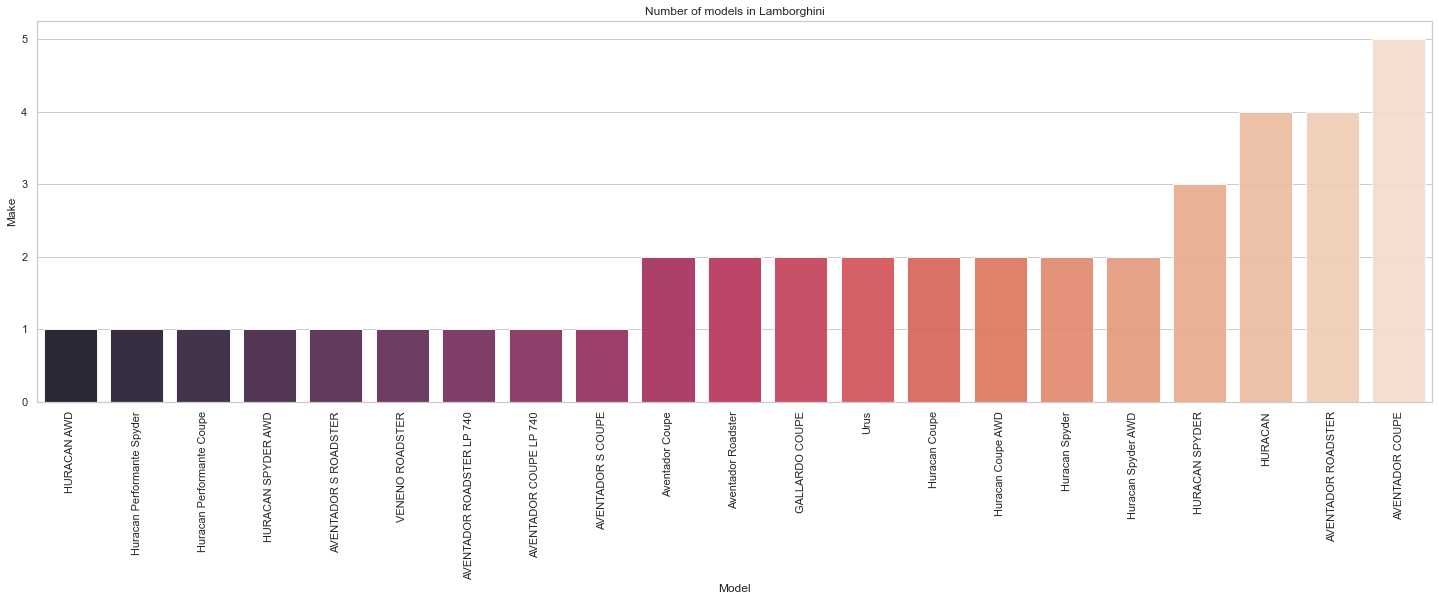

In [ ]:
lamborghini = df[df.Make == 'LAMBORGHINI']
lamborghini_models = lamborghini.groupby('Model').count().reset_index().sort_values('Make', ascending=True)

f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="dark")
ax = sns.barplot(data=lamborghini_models, y='Make',x='Model',alpha=.9, palette="rocket")
plt.title('Number of models in Lamborghini')
plt.xticks(rotation=90)
plt.show()

# 7.Models


In [ ]:
df_Model=df['Model'].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})[0:20]

fig = go.Figure(go.Bar(
    x=df_Model['Model'],y=df_Model['Count'],
    marker={'color': df_Model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 20 Model',xaxis_title="Model ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

# view the median, IQR for various type of vehicles

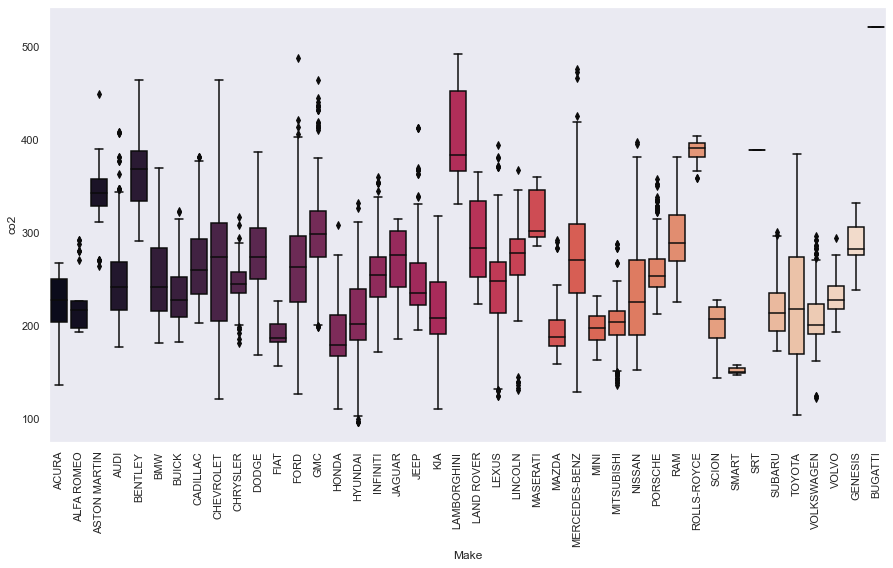

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Make", y="co2", data=df, palette="rocket")
plt.xticks(rotation = 90)
plt.show()

we could see that all models of Rolls-royce has emissions more than 350. Some models(outliers) in Mercedes-Benz and FORD are competing with the maximum emissions

# 8.Fuel

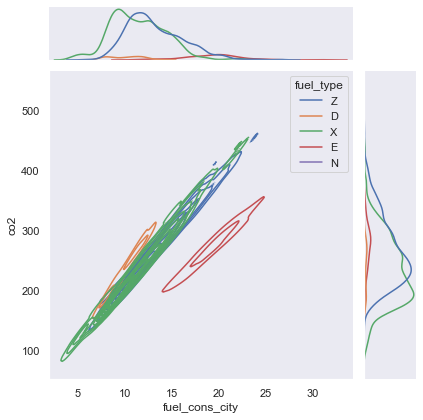

In [ ]:
sns.jointplot(
    data=df,
    x="fuel_cons_city", y="co2", hue="fuel_type",
    kind="kde"
    
)
plt.show()

# 9. Plotting Transmission Distribution

In [ ]:
df["Gears"]= df['Transmission'].str[-1]

df['Transmission']=df['Transmission'].str[0:-1]
df.head()

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2,Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


In [ ]:
transmission_distr =df['Transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='Transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

In [ ]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})

fig = go.Figure(go.Bar(
    x=df_Transmission['Transmission'],y=df_Transmission['Count'],
    marker={'color': df_Transmission['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Transmission['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Transmission Distribution ',xaxis_title="Transmission ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

# 12.Fuel Type

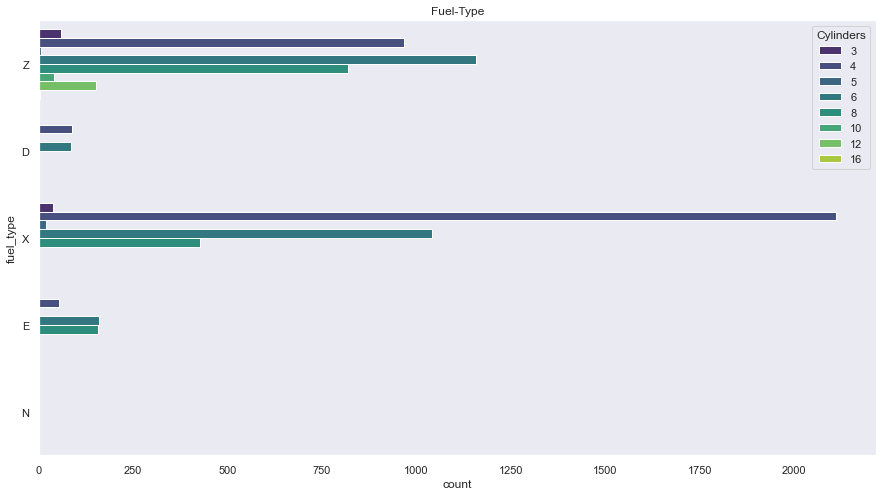

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='Cylinders',palette='viridis')
plt.title('Fuel-Type')
plt.show()

In [ ]:
fig = go.Figure(data=go.Violin(y=df["fuel_cons_city"],
                               box_visible=True,
                               line_color='black',
                               meanline_visible=True,
                               fillcolor='green', opacity=0.4,
                               x0='Fuel Consumption in City'))

fig.show()

In [ ]:
df.head()

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2,Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


# Fuel consumption in City and Highway

In [ ]:
city_hwy_df = df[['fuel_cons_city', 'fuel_cons_hwy', 'fuel_type','co2']]
city_hwy_df.head()

,fuel_cons_city,fuel_cons_hwy,fuel_type,co2
0,9.9,6.7,Z,196
1,11.2,7.7,Z,221
2,6.0,5.8,Z,136
3,12.7,9.1,Z,255
4,12.1,8.7,Z,244


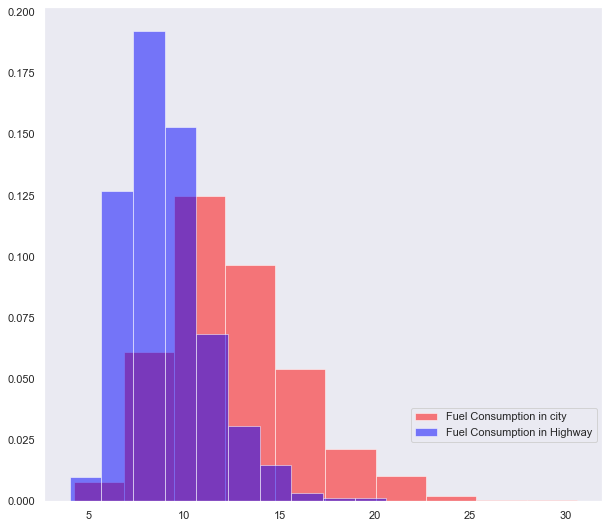

In [ ]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(df['fuel_cons_city'], color="red", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(df['fuel_cons_hwy'], color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
ax = plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

# Obviously as one would expect, Fuel consumption in Highways are higher

<AxesSubplot:xlabel='fuel_cons_hwy', ylabel='Density'>

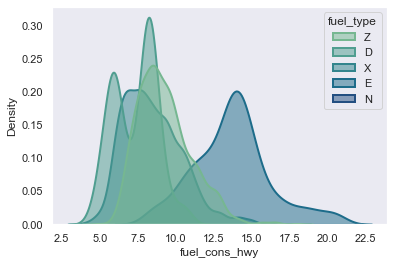

In [ ]:
sns.kdeplot(
   data=city_hwy_df, x="fuel_cons_hwy", hue="fuel_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=2,
)

Fuel types Z and X are used dominantly both in highways and city which are         "Premium gasoline" and "regular gasoline"

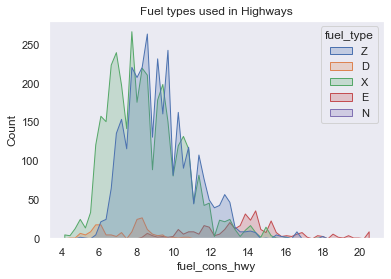

In [ ]:
sns.histplot(city_hwy_df, x="fuel_cons_hwy", hue="fuel_type", element="poly")
plt.title('Fuel types used in Highways')
plt.show()

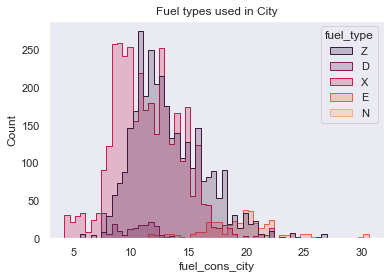

In [ ]:
sns.histplot(city_hwy_df, x="fuel_cons_city", hue="fuel_type", element="step", palette="rocket")
plt.title('Fuel types used in City')
plt.show()

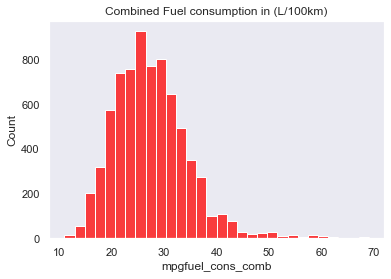

In [ ]:
sns.histplot(data=df, x="mpgfuel_cons_comb", bins=30, color='red')
plt.title('Combined Fuel consumption in (L/100km)')
plt.show()

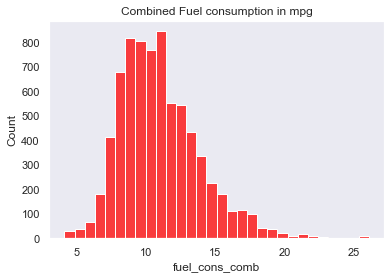

In [ ]:
sns.histplot(data=df, x="fuel_cons_comb", bins=30, color='red')
plt.title('Combined Fuel consumption in mpg')
plt.show()

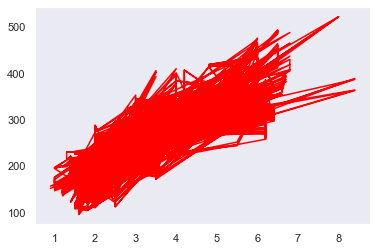

In [ ]:
plt.plot(df["engine_size"], df["co2"],color='red')

<AxesSubplot:xlabel='engine_size', ylabel='co2'>

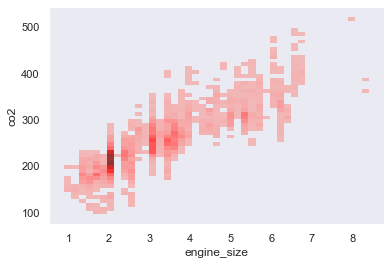

In [ ]:
sns.histplot(df, x="engine_size", y="co2",color='red')

As we see from the histograms, the distribution is near symmetrical and less skewed. SO,we need not apply Log transformations..

# Correlations in the data

In [ ]:
df.corr()


,engine_size,Cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


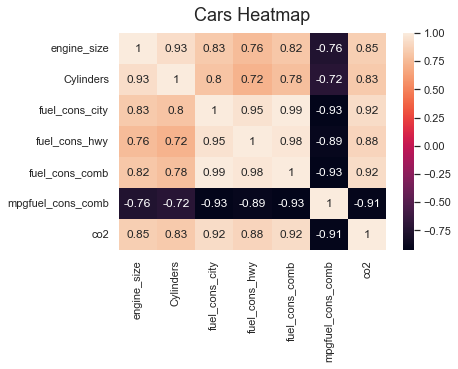

In [ ]:
cor = df.corr()
heatmap = sns.heatmap(cor, annot=True , cmap='rocket')

heatmap.set_title('Cars Heatmap', fontdict={'fontsize':18}, pad=12);

# Machine Learning </a>

# Data Preprocessing

In [ ]:
df.drop(['Make','Model','vehicle_class','fuel_cons_city','fuel_cons_hwy','Transmission','mpgfuel_cons_comb'],inplace=True,axis=1)


In [ ]:
df.head()

,engine_size,Cylinders,fuel_type,fuel_cons_comb,co2,Gears
0,2.0,4,Z,8.5,196,5
1,2.4,4,Z,9.6,221,6
2,1.5,4,Z,5.9,136,7
3,3.5,6,Z,11.1,255,6
4,3.5,6,Z,10.6,244,6


In [ ]:
df_N=df[df["fuel_type"]=="N"]
indexs=df_N.index
df_N

,engine_size,Cylinders,fuel_type,fuel_cons_comb,co2,Gears
2439,3.6,6,N,12.7,213,6


In [ ]:
# Kick Fuel Type N
for i in indexs:
    df.drop(i, axis = 0,inplace = True)

In [ ]:
df[df["fuel_type"]=="N"]

,engine_size,Cylinders,fuel_type,fuel_cons_comb,co2,Gears


In [ ]:
dums = pd.get_dummies(df['fuel_type'],prefix="Fuel_Type",drop_first=True)
dums[0:15]

,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [ ]:
frames = [df, dums]
result = pd.concat(frames,axis=1)
result

,engine_size,Cylinders,fuel_type,fuel_cons_comb,co2,Gears,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,Z,8.5,196,5,0,0,1
1,2.4,4,Z,9.6,221,6,0,0,1
2,1.5,4,Z,5.9,136,7,0,0,1
3,3.5,6,Z,11.1,255,6,0,0,1
4,3.5,6,Z,10.6,244,6,0,0,1
...,...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,9.4,219,8,0,0,1
7381,2.0,4,Z,9.9,232,8,0,0,1
7382,2.0,4,Z,10.3,240,8,0,0,1
7383,2.0,4,Z,9.9,232,8,0,0,1


In [ ]:
result.drop(['fuel_type'],inplace=True,axis=1)
result.head()

,engine_size,Cylinders,fuel_cons_comb,co2,Gears,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,196,5,0,0,1
1,2.4,4,9.6,221,6,0,0,1
2,1.5,4,5.9,136,7,0,0,1
3,3.5,6,11.1,255,6,0,0,1
4,3.5,6,10.6,244,6,0,0,1


 # Local Outlier Factor</a>

*  The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [ ]:
df_out=result.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

ValueError: could not convert string to float: 'V'

In [ ]:
np.sort(df_scores)[0:25]


array([-2.29177231e+10, -2.29177231e+10, -1.53760016e+10, -1.53760016e+10,
       -5.51234422e+09, -5.02244403e+09, -5.02244403e+09, -2.50810479e+09,
       -2.50810479e+09, -2.50810479e+09, -2.50810479e+09, -2.50810479e+09,
       -2.50810479e+09, -2.50810479e+09, -1.46429970e+09, -1.04592836e+09,
       -1.04592836e+09, -1.04592836e+09, -1.00000000e+09, -7.40000001e+08,
       -7.40000001e+08, -7.40000001e+08, -7.40000001e+08, -7.40000001e+08,
       -7.40000001e+08])

In [ ]:
threshold_value = np.sort(df_scores)[24]
threshold_value

-740000001.0349972

In [ ]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

,engine_size,Cylinders,fuel_cons_comb,co2,Gears,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
935,2.0,4,9.5,218,6,0,0,1
949,2.0,4,9.5,218,V,0,0,1
2152,2.0,4,9.5,219,6,0,0,1
2398,2.0,4,9.3,218,8,0,0,1
3292,2.0,4,9.3,218,8,0,0,1
4071,2.0,4,9.3,218,7,0,0,1
4168,1.6,4,8.9,209,8,0,0,1
4379,2.4,4,8.9,209,8,0,0,1
5152,2.0,4,9.3,218,9,0,0,1
5463,2.4,4,8.9,209,8,0,0,1


In [ ]:
# Kick Outliers
for i in indexs:
    result.drop(i, axis = 0,inplace = True)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7365 entries, 0 to 7384
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   engine_size     7365 non-null   float64
 1   Cylinders       7365 non-null   int64  
 2   fuel_cons_comb  7365 non-null   float64
 3   co2             7365 non-null   int64  
 4   Gears           7365 non-null   object 
 5   Fuel_Type_E     7365 non-null   uint8  
 6   Fuel_Type_X     7365 non-null   uint8  
 7   Fuel_Type_Z     7365 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(3)
memory usage: 366.8+ KB


# Sample DataFrame</a>

In [ ]:
sample_df=result.sample(n=200,random_state=35)
sample_df

,engine_size,Cylinders,fuel_cons_comb,co2,Gears,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
6175,4.7,8,15.8,370,7,0,0,1
6744,3.6,6,10.3,242,8,0,1,0
3754,5.3,8,17.1,284,6,1,0,0
5948,2.4,4,10.1,240,6,0,1,0
4174,2.0,4,9.4,220,V,0,1,0
...,...,...,...,...,...,...,...,...
7217,2.0,4,8.8,206,6,0,1,0
115,3.0,6,9.2,212,8,0,0,1
5503,3.0,6,9.9,234,8,0,0,1
3453,1.4,4,7.9,185,6,0,1,0


In [ ]:
indexs=sample_df.index
indexs

Int64Index([6175, 6744, 3754, 5948, 4174, 4955, 1885, 1347, 4441, 3921,
            ...
            1464, 5305,  507, 5574, 6244, 7217,  115, 5503, 3453, 5757],
           dtype='int64', length=200)

In [ ]:
# Kick Sample DataFrame
for i in indexs:
    result.drop(i, axis = 0,inplace = True)

In [ ]:
sample_df_Xtest=sample_df.drop(['co2'],axis=1)
sample_df_ytest=sample_df["co2"]

In [ ]:
sample_df_Xtest = (sample_df_Xtest - np.min(sample_df_Xtest)) / (np.max(sample_df_Xtest) - np.min(sample_df_Xtest)).values
sample_df_Xtest["engine_size"]=sample_df_Xtest["engine_size"].map(lambda x:round(x,2))
sample_df_Xtest["Cylinders"]=sample_df_Xtest["Cylinders"].map(lambda x:round(x,2))
sample_df_Xtest["fuel_cons_comb"]=sample_df_Xtest["fuel_cons_comb"].map(lambda x:round(x,2))
sample_df_Xtest

TypeError: unsupported operand type(s) for -: 'str' and 'str'

##  Normalize

In [ ]:
X = result.drop(['co2'], axis= 1)
y = result["co2"]

In [ ]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
X

,engine_size,Cylinders,fuel_cons_comb,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,0.146667,0.076923,0.200000,0.0,0.0,1.0
1,0.200000,0.076923,0.250000,0.0,0.0,1.0
2,0.080000,0.076923,0.081818,0.0,0.0,1.0
3,0.346667,0.230769,0.318182,0.0,0.0,1.0
4,0.346667,0.230769,0.295455,0.0,0.0,1.0
...,...,...,...,...,...,...
7380,0.146667,0.076923,0.240909,0.0,0.0,1.0
7381,0.146667,0.076923,0.263636,0.0,0.0,1.0
7382,0.146667,0.076923,0.281818,0.0,0.0,1.0
7383,0.146667,0.076923,0.263636,0.0,0.0,1.0


In [ ]:
X["engine_size"]=X["engine_size"].map(lambda x:round(x,2))
X["Cylinders"]=X["Cylinders"].map(lambda x:round(x,2))
X["fuel_cons_comb"]=X["fuel_cons_comb"].map(lambda x:round(x,2))
X

,engine_size,Cylinders,fuel_cons_comb,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,0.15,0.08,0.20,0.0,0.0,1.0
1,0.20,0.08,0.25,0.0,0.0,1.0
2,0.08,0.08,0.08,0.0,0.0,1.0
3,0.35,0.23,0.32,0.0,0.0,1.0
4,0.35,0.23,0.30,0.0,0.0,1.0
...,...,...,...,...,...,...
7380,0.15,0.08,0.24,0.0,0.0,1.0
7381,0.15,0.08,0.26,0.0,0.0,1.0
7382,0.15,0.08,0.28,0.0,0.0,1.0
7383,0.15,0.08,0.26,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (5373, 6)
y_train (5373,)
X_test (1792, 6)
y_test (1792,)


# Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
slr = LinearRegression()
y_col = "co2"

X = df.drop(y_col, axis=1)
y = df[y_col]
X = df[['engine_size']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [ ]:
slr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = slr.predict(X_test_s)

In [ ]:
print(f'R2 score is {r2_score(y_pred,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

R2 score is 0.6442253628790692
Residual sum of squares (MSE): 895.56


##### 65% accuracy

# Multiple Linear Regression

In [ ]:
mlr = LinearRegression()
X = df[['engine_size', 'Cylinders', 'fuel_cons_comb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [ ]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))

R2 score is 0.8589826263801746
Residual sum of squares (MSE): 421.15


In [ ]:
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

Co-efficients are [ 6.88492819 11.97722921 39.33091187]
Intercept is 250.6097891274908


We trained upto 86% accurately predicting model

# Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

6.979103976233913

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 750]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1,
                          verbose = 2)

In [ ]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 750]},
             verbose=2)

In [ ]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 750}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 5, 
                                 n_estimators =750)

In [ ]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=5, n_estimators=750)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.2065542503616644

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Significance Levels')

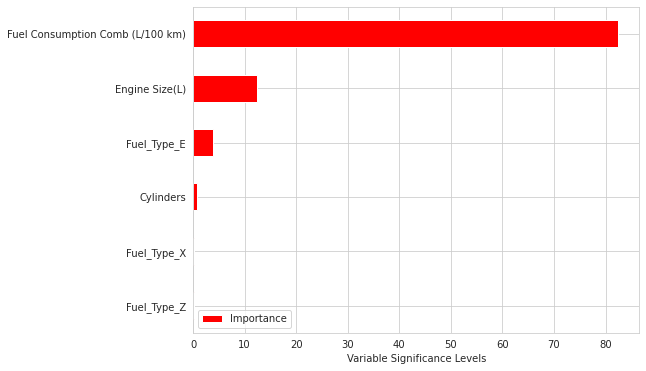

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [ ]:
rf_tuned.score(sample_df_Xtest, sample_df_ytest)

0.6613007251323961

In [ ]:
pred=rf_tuned.predict(sample_df_Xtest)
frames = [pred, sample_df_ytest.values]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_Rf=result_pred.rename(columns={0:'Pred_RF',1:'Real'})
result_pred_Rf["Pred_RF"]=result_pred_Rf["Pred_RF"].map(lambda x:round(x,2))
result_pred_Rf["Diff"]=result_pred_Rf["Pred_RF"]-result_pred_Rf["Real"]
result_pred_Rf["Diff"]=result_pred_Rf["Diff"]
print("Mean Diff: ",abs(result_pred_Rf["Diff"]).mean())
result_pred_Rf.head(20)

Mean Diff:  26.8658


,Pred_RF,Real,Diff
0,209.79,193.0,16.79
1,298.33,265.0,33.33
2,268.50,270.0,-1.50
3,399.89,338.0,61.89
4,179.50,175.0,4.50
5,387.41,342.0,45.41
6,233.06,214.0,19.06
7,362.30,314.0,48.30
8,359.51,313.0,46.51
9,107.71,120.0,-12.29


# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(slr, X_train_s, y_train, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7227045907278793 and the standard deviation is 0.00597738046971076


In [ ]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(mlr, X_train_sm, y_train, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.8812843012364489 and the standard deviation is 0.010067463510330511


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

KNeighborsRegressor()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.093698881905493

In [ ]:
knn_model.score(X_train, y_train)

0.9964093336774597

In [ ]:
knn_model.score(sample_df_Xtest, sample_df_ytest)

-0.2109643168678681

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

2

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [ ]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

3.818916585096953

In [ ]:
knn_tuned.score(sample_df_Xtest, sample_df_ytest)

-0.3458687103323501

In [ ]:
pred=knn_tuned.predict(sample_df_Xtest)
frames = [pred, sample_df_ytest.values]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_Knn=result_pred.rename(columns={0:'Pred_KNN',1:'Real'})
result_pred_Knn["Pred_KNN"]=result_pred_Knn["Pred_KNN"].map(lambda x:round(x,2))
result_pred_Knn["Diff"]=result_pred_Knn["Pred_KNN"]-result_pred_Knn["Real"]
result_pred_Knn["Diff"]=result_pred_Knn["Diff"]
print("Mean Diff: ",abs(result_pred_Knn["Diff"]).mean())
result_pred_Knn.head(20)

Mean Diff:  58.9325


,Pred_KNN,Real,Diff
0,471.5,370.0,101.5
1,296.0,242.0,54.0
2,354.0,284.0,70.0
3,288.0,240.0,48.0
4,261.5,220.0,41.5
5,404.5,313.0,91.5
6,389.0,359.0,30.0
7,226.0,191.0,35.0
8,267.0,219.0,48.0
9,185.5,170.0,15.5


# Conclusion  

* As you can see our models are overfeeding.<br>
* Learning is less.<br>
* We can create new data columns. <br>
* We can drop the columns that are not important. <br>
* We need do feature engineering.<br>
